# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import calplot as clt

/Users/nandapop/Documents/Bootcamp/time_series_project/.venv/lib/python3.8/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
df = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df = pd.read_csv(df)

In [4]:
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

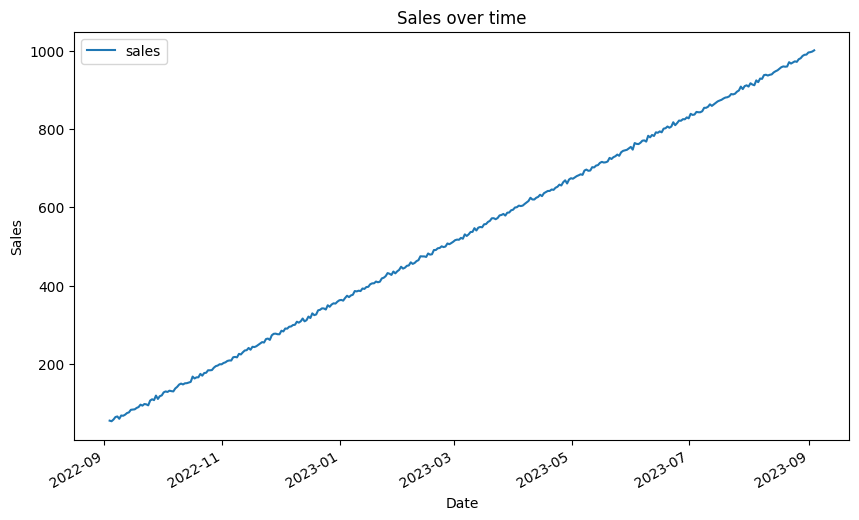

In [6]:
df.plot(y='sales', title='Sales over time', figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.savefig(".../Documents/Bootcamp/time_series_project/data/sales_over_time.png")
plt.show()

Heatmap Calendar

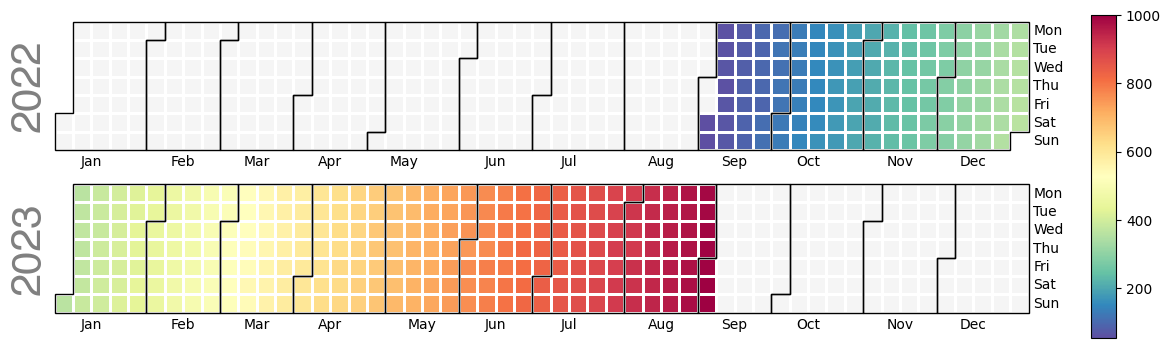

In [20]:
clt.calplot(data = df['sales'],edgecolor = 'black', cmap = 'Spectral_r')
suptitle = 'Heatmap Calendar'
plt.savefig(".../Documents/Bootcamp/time_series_project/data/heat_map_calendar.png")
plt.show()

In [8]:
print(pd.infer_freq(df.index))

D


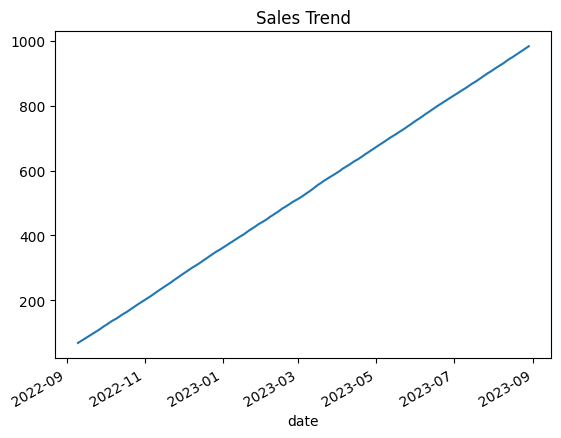

In [21]:
decomposition = seasonal_decompose(df['sales'], model='additive', period=12)
decomposition.trend.plot(title='Sales Trend')
plt.savefig(".../Documents/Bootcamp/time_series_project/data/sales_trend.png")
plt.show()

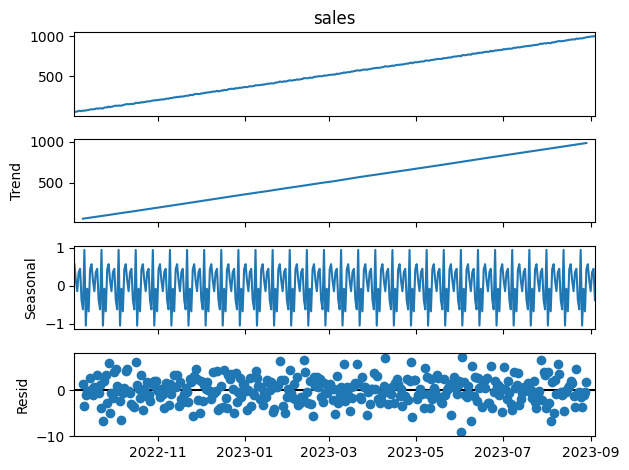

In [22]:
decomposition.plot()
plt.savefig(".../Documents/Bootcamp/time_series_project/data/decomposition.png")
plt.show()

In [11]:
adf_result = adfuller(df['sales'].dropna())
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non stationary.")

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

The time series is non stationary.
ADF Statistic: 0.5454141937063741
p-value: 0.9861899815311063


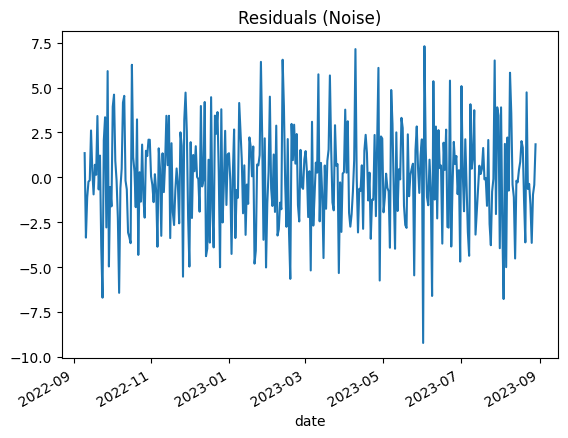

In [23]:
decomposition.resid.plot(title='Residuals (Noise)')
plt.savefig(".../Documents/Bootcamp/time_series_project/data/residuals_noise.png")
plt.show()

In [13]:
test_size = 12 
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

In [14]:
model = auto_arima(train['sales'], seasonal=True, m=12, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1791.299, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2036.304, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1915.540, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2142.784, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1789.542, Time=0.54 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1787.236, Time=0.30 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1789.509, Time=1.45 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1788.601, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1785.936, Time=0.23 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1787.920, Time=1.03 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=1787.889, Time=0.87 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=1790.555, Time=0.96 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1783.937, Time=0.15 sec
 ARIMA(1,1,1)(1,0,0)[12]

In [15]:
model.fit(train['sales'])

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

/var/folders/bm/4l2lkhpj173c_7z1bhd6mbdh0000gq/T/ipykernel_28957/4004400924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_sales'] = forecast


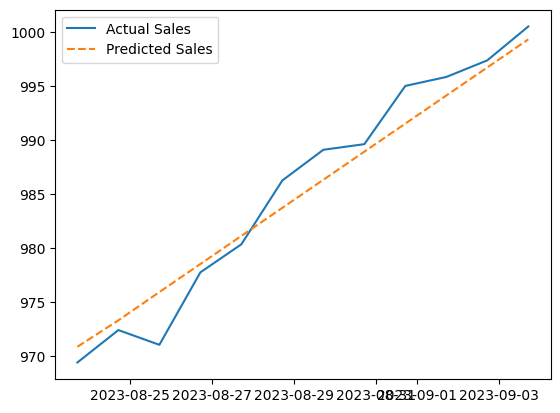

In [24]:
forecast = model.predict(n_periods=len(test))
test['predicted_sales'] = forecast

plt.plot(test.index, test['sales'], label='Actual Sales')
plt.plot(test.index, test['predicted_sales'], label='Predicted Sales', linestyle='--')
plt.savefig(".../Documents/Bootcamp/time_series_project/data/predicates_sales.png")
plt.legend()
plt.show()

In [17]:

mae = mean_absolute_error(test['sales'], test['predicted_sales'])
rmse = np.sqrt(mean_squared_error(test['sales'], test['predicted_sales']))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 1.8186643479470206
RMSE: 2.22525065126871


In [18]:
mape = np.mean(np.abs((test['sales'] - test['predicted_sales']) / test['sales'])) * 100
print(f'MAPE: {mape}%')

MAPE: 0.1847757501565897%


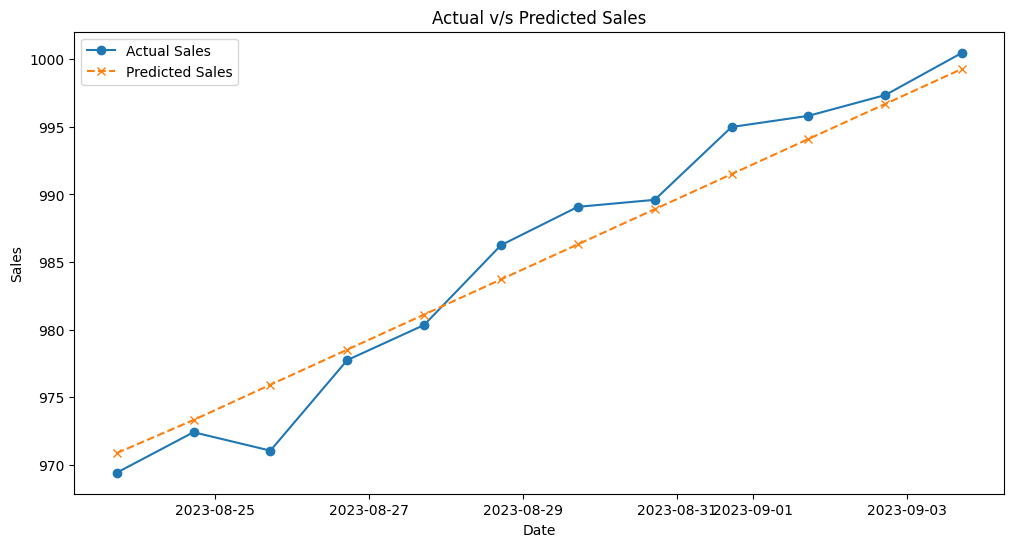

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['sales'], label='Actual Sales', marker='o')
plt.plot(test.index, test['predicted_sales'], label='Predicted Sales', linestyle='--', marker='x')
plt.title('Actual v/s Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.savefig(".../Documents/Bootcamp/time_series_project/data/actual_predicted_sales.png")
plt.show()
